In [1]:
import preprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import info_theory
import plotting

In [2]:
# Define assets and file paths
assets = ["commodity", "credit", "currency", "energy", "equity", "interest", "metals", "real_estate", "volatility"]
file_paths = {asset: f"../data/{asset}_data.xlsx" for asset in assets}

# Load data
aligned_data, tickers = preprocess.load_and_align_data(file_paths)

# Drop tickers with many missing points
aligned_data, tickers = preprocess.drop_short_tickers(aligned_data, tickers, max_nan=50)
aligned_data['GB03'] + 0.1

# Compute log returns
log_returns = preprocess.compute_log_returns(aligned_data)

# Interest data has negative and zero values
# interest_data = aligned_data[tickers['interest']]
# log_returns[tickers["interest"]] = interest_data

# Drop NA
log_returns = log_returns.dropna()

Tickers to drop/replace due to insufficient data:
['FXJPEMCS', 'QCLN']


c:\Users\akhma\OneDrive\Onenote\Python\my_venv\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


In [3]:
log_returns

,BCOM,CRB CMDT,CRB METL,CRB RIND,SPGSAGP,MOODCAAA,LF98TRUU,DJCBP,LMBITR,LC07TRUU,...,GB03,GT02,GT10,BCOMPR,DJGSP,REIT,DJUSRE,EPRA,VIX,VXN
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-04,-0.006318,-0.009300,-0.027892,-0.009850,-0.023311,0.010989,0.000156,-0.004388,-0.000826,-0.002611,...,0.045245,0.033686,0.018582,-0.003148,-0.023747,-0.012812,-0.013447,-0.010845,-0.007128,0.028313
2005-01-05,-0.001498,0.001510,0.000483,0.003783,-0.022794,-0.003650,-0.001831,0.000733,0.000431,-0.000097,...,-0.013274,0.002809,-0.001866,0.000245,-0.003067,-0.038806,-0.038433,-0.005347,0.007838,0.005964
2005-01-06,0.016104,-0.001476,-0.016444,-0.007361,0.005714,0.001826,-0.000598,-0.001099,0.000350,0.000516,...,-0.004320,-0.015387,-0.004681,-0.013124,-0.005429,0.007550,0.007945,-0.002521,-0.036867,-0.002481
2005-01-07,-0.001910,0.005139,0.018090,0.007579,0.001899,-0.001826,-0.000325,-0.000825,0.000709,-0.000226,...,0.003889,0.010389,0.001875,-0.003921,0.003605,0.000287,0.000609,0.014654,-0.006649,-0.049909
2005-01-10,0.002492,-0.000171,0.007883,0.003551,0.006311,-0.003663,-0.000885,0.000734,0.000473,0.000323,...,0.000000,0.007799,0.000000,0.000430,0.009189,-0.003294,-0.002088,0.002704,-0.019462,0.023737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-12,-0.013605,-0.003252,-0.020410,-0.011386,-0.009395,0.021633,-0.001196,-0.007839,0.000464,-0.006516,...,0.000441,0.020240,0.028397,-0.030627,-0.079413,-0.018950,-0.019279,-0.015614,-0.015515,0.013334
2024-11-13,-0.000863,0.001814,-0.005660,-0.001935,-0.001823,0.015444,-0.000004,-0.004919,0.000647,-0.000654,...,-0.007748,-0.012515,0.005180,-0.006529,-0.014328,0.005783,0.006265,-0.013243,-0.048043,-0.034815
2024-11-14,-0.007853,-0.001122,-0.006477,-0.003030,-0.002832,-0.009625,-0.000358,-0.000558,0.000163,-0.000386,...,0.006424,0.013666,-0.003375,-0.004809,0.006074,-0.009676,-0.009653,0.013018,0.020474,0.011364


In [5]:
abs_log_returns = np.abs(log_returns)

In [26]:
log_returns.columns

Index(['BCOM', 'CRB CMDT', 'CRB METL', 'CRB RIND', 'SPGSAGP', 'MOODCAAA',
       'LF98TRUU', 'DJCBP', 'LMBITR', 'LC07TRUU', 'DXY', 'BBDXY', 'MXWO0EN',
       'SPGSEN', 'SPX', 'NDX', 'RTY', 'CCMP', 'SML', 'SGX', 'GB03', 'GT02',
       'GT10', 'BCOMPR', 'DJGSP', 'REIT', 'DJUSRE', 'EPRA', 'VIX', 'VXN'],
      dtype='object')

In [8]:
def discretize_equal_width(contin_data, num_bins=5):
    min_val = contin_data.min()
    max_val = contin_data.max()
    if num_bins == 2:
        med = np.median(contin_data)
        bins = [min_val, med, max_val]
    else:
        q1 = np.percentile(contin_data, 25)
        q3 = np.percentile(contin_data, 75)
        bins = [min_val] + np.linspace(q1, q3, num_bins - 1).tolist() + [max_val]
    # std = np.std(contin_data)
    # bins = std * np.arange(-num_bins//2, num_bins//2 + 1)
    return np.digitize(contin_data, bins)

def discretize_equal_freq(contin_data, num_bins=5):
    # Use quantiles to create bins
    min_val = contin_data.min()
    max_val = contin_data.max()
    if num_bins == 2:
        med = np.median(contin_data)
        bins = [min_val, med, max_val]
    else:
        q1 = np.percentile(contin_data, 25)
        q3 = np.percentile(contin_data, 75)
        iqr_data = contin_data[(contin_data >= q1) & (contin_data <= q3)]
        quantiles = np.linspace(0, 1, num_bins - 1)
        bins = [min_val] + np.quantile(iqr_data, quantiles).tolist() + [max_val]
    
    return np.digitize(contin_data, bins)

def discretize_df(dataframe, num_bins=5, disc_type = 'freq'):
    discretized = {}
    columns = dataframe.columns
    if disc_type == 'width':
        discretize = discretize_equal_width
    elif disc_type == 'freq':
        discretize = discretize_equal_freq

    for col in columns:
        discrete_col = discretize(dataframe[col])
        discretized[col] = discrete_col

    dates = dataframe.index
    discretized = pd.DataFrame(discretized)
    discretized.index = pd.to_datetime(dates)
    return discretized

In [9]:
discrete_log_returns = discretize_df(log_returns)

In [20]:
def pca_and_discretize(log_returns, tickers, num_bins, discretize_fn=preprocess.discretize, plot_explained_var_ratio=False):
    asset_classes_discrete = {}
    explained_variance_ratios = {}
    asset_classes = tickers.keys()
    for asset_class in asset_classes:
        vals = log_returns[tickers[asset_class]]
        pca, pca_components, explained_variance_ratio = preprocess.compute_pca(vals)
        explained_variance_ratios[asset_class] = explained_variance_ratio
        X = pca_components[:, 0]  # Take first principal component
        discrete_X = discretize_fn(X, num_bins)
        asset_classes_discrete[asset_class] = discrete_X

    dates = log_returns.index
    asset_classes_discrete = pd.DataFrame(asset_classes_discrete)
    asset_classes_discrete.index = dates
    asset_classes_discrete.index = pd.to_datetime(asset_classes_discrete.index)

    if plot_explained_var_ratio:
        for asset, variance_ratio in explained_variance_ratios.items():
            plt.plot(np.cumsum(variance_ratio), marker="o", label=asset)
        plt.xlabel("Number of Components")
        plt.ylabel("Cumulative Explained Variance")
        plt.title("PCA Explained Variance Ratios")
        plt.legend()
        plt.show()
    return asset_classes_discrete

In [33]:
def discretize(contin_data, num_bins=1):
    std = np.std(contin_data)
    bins = std * np.arange(-num_bins//2, num_bins//2 + 1)
    return np.digitize(contin_data, bins)

asset_classes_discrete = pca_and_discretize(log_returns, tickers, num_bins=12, discretize_fn=discretize, plot_explained_var_ratio=False)

In [28]:
asset_classes_discrete

,commodity,credit,currency,energy,equity,interest,metals,real_estate,volatility
Date,,,,,,,,,
2005-01-04,0,1,5,3,1,3,2,2,3
2005-01-05,3,3,3,2,2,2,2,1,3
2005-01-06,2,2,4,4,3,2,2,3,2
2005-01-07,4,2,3,2,2,3,2,3,2
2005-01-10,3,3,2,3,3,3,3,2,3
...,...,...,...,...,...,...,...,...,...
2024-11-12,0,1,5,2,2,3,0,1,3
2024-11-13,2,2,3,3,2,2,2,2,2
2024-11-14,2,3,3,3,2,3,2,2,3


In [34]:
whole_window = [(asset_classes_discrete.index.min(), asset_classes_discrete.index.max(), asset_classes_discrete)]

In [11]:
def compute_measure_matrix(windows, measure_func, n_surrogates=0, *measure_args, **measure_kwargs):
    """
    Generalized matrix computation for any pairwise measure
    
    Parameters:
        windows: iterable of (start_date, end_date, window_data)
        measure_func: function that takes two arrays and returns a scalar
        measure_kwargs: keyword arguments for measure_func
        
    Returns:
        measure_matrix: numpy array of shape (n_assets, n_assets, num_windows)
    """
    assets = windows[0][2].columns
    n = len(assets)
    num_windows = len(windows)
    measure_matrix = np.empty((n, n, num_windows))
    surrogate_matrix = np.empty((n_surrogates, n, n, num_windows))
    for t, (_, _, window_data) in enumerate(windows):
        for i, asset1 in enumerate(assets):
            for j, asset2 in enumerate(assets):
                if asset1 == asset2:
                    measure_matrix[i, j, t] = 0.0
                else:
                    measure_matrix[i, j, t] = measure_func(
                        window_data[asset1].values,
                        window_data[asset2].values,
                        *measure_args,
                        **measure_kwargs
                    )

                for k in range(n_surrogates):
                    if asset1 == asset2:
                        surrogate_matrix[k, i, j, t] = 0.0
                    else:
                        surrogate_matrix[k, i, j, t] = measure_func(
                            np.random.permutation(window_data[asset1].values),
                            window_data[asset2].values,
                            *measure_args,
                            **measure_kwargs
                        )
        #print(f"Window {t+1}/{num_windows} computed")
    avg_surrogate_matrix = np.mean(surrogate_matrix, axis=0)
        
    return measure_matrix, avg_surrogate_matrix

In [35]:
te_matrix, te_matrix_surrogate = compute_measure_matrix(whole_window, measure_func = info_theory.transfer_entropy_fast, n_surrogates=10, k=1, l=1)

In [36]:
signif_te_matrix = np.squeeze(np.maximum((te_matrix - te_matrix_surrogate), 0), axis=2)

In [44]:
endpoints = [end_date for _, end_date, _ in whole_window]
plotting.create_measure_heatmap(np.expand_dims(signif_te_matrix, axis=2), asset_classes_discrete.columns, endpoints, "Transfer Entropy")

In [38]:
import network
import networkx as nx

In [41]:
G = nx.from_numpy_array(signif_te_matrix, create_using=nx.DiGraph)
mapping = {i: name for i, name in enumerate(asset_classes_discrete.columns)}
G = nx.relabel_nodes(G, mapping)
edge_weights = nx.get_edge_attributes(G, 'weight')

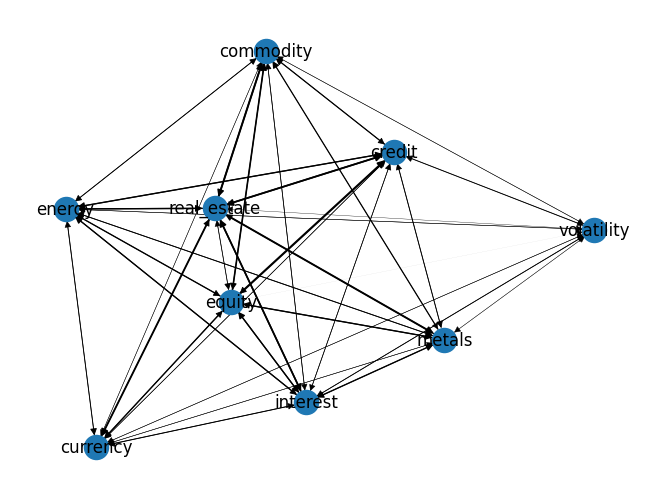

In [42]:
nx.draw(G, 
        with_labels=True,
        width = [edge_weights.get(edge, 1) * 50 for edge in G.edges])

In [45]:
def network_properties(G):

    analysis = {}

    in_degrees = dict(G.in_degree(weight="weight"))
    out_degrees = dict(G.out_degree(weight="weight"))
    analysis['in_degree'] = pd.Series(in_degrees)
    analysis['out_degree'] = pd.Series(out_degrees)
    analysis['betweenness_centr'] = nx.betweenness_centrality(G, weight="weight")
    analysis['e_vector_centr'] = nx.eigenvector_centrality(G, weight="weight")
    analysis['clustering'] = nx.clustering(G, weight="weight")
    return pd.DataFrame(analysis)

In [46]:
network_properties(G)

,in_degree,out_degree,betweenness_centr,e_vector_centr,clustering
commodity,0.121335,0.081916,0.017857,0.379142,0.375278
credit,0.120490,0.107775,0.000000,0.362590,0.402672
currency,0.106975,0.063906,0.017857,0.335800,0.340412
energy,0.115035,0.101366,0.000000,0.357180,0.403810
equity,0.095040,0.136627,0.000000,0.311813,0.427467
interest,0.100068,0.128503,0.000000,0.313181,0.410101
metals,0.108840,0.094882,0.000000,0.342030,0.380073
real_estate,0.126417,0.159703,0.017857,0.397981,0.442294
volatility,0.036909,0.056428,0.446429,0.117293,0.221717


In [51]:
def discretize(contin_data, num_bins=6):
    # Create quantile-based bins so that each bin contains roughly equal number of data points.
    quantiles = np.linspace(0, 100, num_bins + 1)
    bins = np.percentile(contin_data, quantiles)
    # Avoid duplicate bin edges in case of ties.
    bins = np.unique(bins)
    discretized = np.digitize(contin_data, bins[1:-1])
        
    return discretized

asset_classes_discrete = pca_and_discretize(log_returns, tickers, 3, discretize)
whole_window = [(asset_classes_discrete.index.min(), asset_classes_discrete.index.max(), asset_classes_discrete)]
te_matrix, te_matrix_surrogate = compute_measure_matrix(whole_window, measure_func = info_theory.transfer_entropy_fast, n_surrogates=10, k=1, l=1)
signif_te_matrix = np.squeeze(np.maximum((te_matrix - te_matrix_surrogate), 0), axis=2)
endpoints = [end_date for _, end_date, _ in whole_window]
plotting.create_measure_heatmap(np.expand_dims(signif_te_matrix, axis=2), asset_classes_discrete.columns, endpoints, "Transfer Entropy")